In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

<!DOCTYPE doctype html>
<html lang="zh-TW">
 <head>
  <meta charset="utf-8"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   圍棋 - Google 搜尋
  </title>
  <script nonce="qu8mcswxA3y33wvYkfKEvg==">
   (function(){var a=window.performance;window.start=(new Date).getTime();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,e=c.responseStart;if(e>d&&e<=window.start){window.start=e;b.wsrt=e-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.google||{};google.aft=function(f){f.setAttribute("data-iml",+new Date)};}).call(this);(function(){window.jsarwt=function(){return!1};}).call(this);(function(){var c=[],e=0;window.ping=function(b){-1==b.indexOf("&zx")&&(b+="&zx="+(new Date).getTime());var a=new Image,d=e++;c[d]=a;a.onerror=a.onload=a.onabort=function(){delete c[d]};a.src=b};}).call(this);
  </script>
  <style>
   body{margin:0 auto;max-width:736px;padding:0 8px}a{color:#1967D2;text-decoration:n
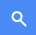
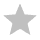
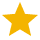
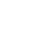
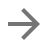
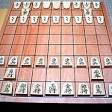
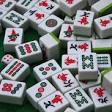
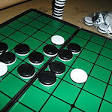
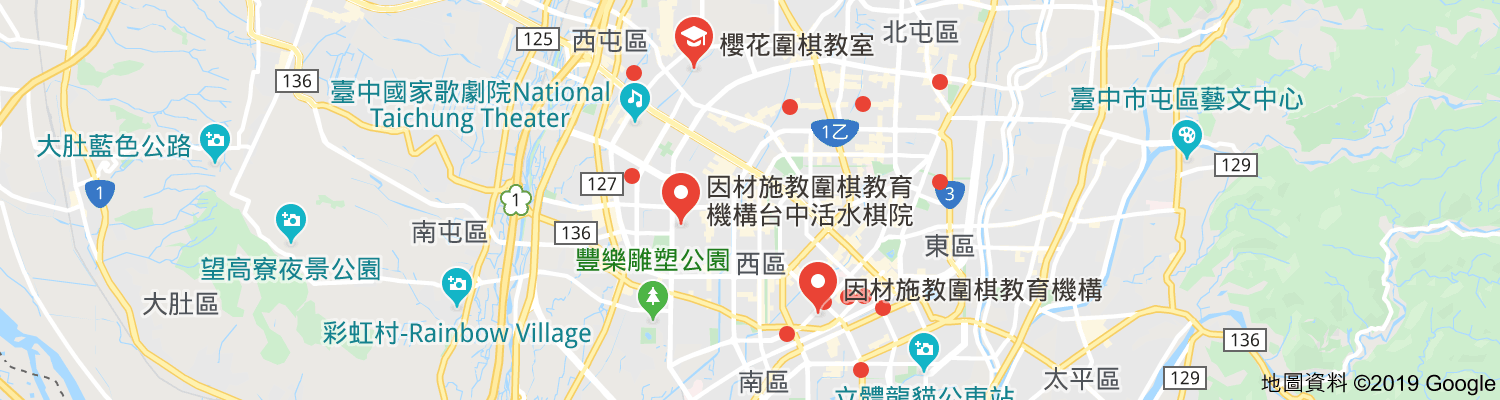
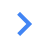

In [5]:
import requests
from bs4 import BeautifulSoup

google_url = 'https://www.google.com.tw/search'

my_params = {'q':'圍棋'}
r = requests.get(google_url,params = my_params)

if r.status_code == requests.codes.ok:
    soup = BeautifulSoup(r.text,'html.parser')
    print(soup.prettify())
    
    items = soup.select('div.kCrYT > a[href^="/url"]')
    for i in items:
        print("標題: " + i.text)
        print("網址: " + i.get('href'))

Building prefix dict from C:\Users\K410\文字雲\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\K410\AppData\Local\Temp\jieba.u63ebedfde141b6c38dd943b00325bb79.cache
Loading model cost 1.133 seconds.
Prefix dict has been built succesfully.


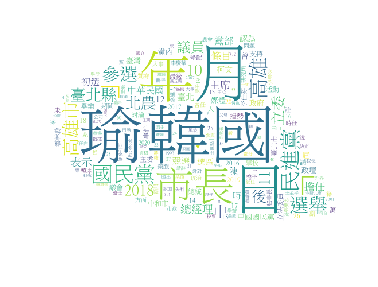

In [4]:
text = open('news1.txt', "r",encoding="utf-8").read()  #讀文字資料
 
jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
#with open('dictionary/stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')   
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter(terms)
# 可列印詞的統計數量
#print(diction)

font = "C:\\Windows\\Fonts\\mingliu.ttc"  #設定字型

mask = np.array(Image.open("arrow.png"))  #設定文字雲形狀 
#wordcloud = WordCloud(font_path=font) 
wordcloud = WordCloud(background_color="white",mask=mask,font_path=font)  #背景顏色預設黑色,改為白色,字體為宋體
wordcloud.generate_from_frequencies(diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")  #存檔